# Objectives:

In this notebook, 

1. We create a synthetic dataset by 
* selecting few random centeroids
* create n random datapoints around each centeriod
2.  plot the clusters created as a results of this synthetic data
3. Apply kmeans to see if the algorithm can mimic the clusters the way we did!
4. You play abit with hyperparameters and see it for yourself

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

### Generating clusters to show how K-Means reproduce them 

#### Generating centers

[[0.35249569 0.56958297]
 [0.69874455 0.01498347]
 [0.62970274 0.74045526]
 [0.33542068 0.49953869]
 [0.04449576 0.73171872]
 [0.3504839  0.14896269]
 [0.61453763 0.07401248]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # Remove the CWD from sys.path while we load stuff.


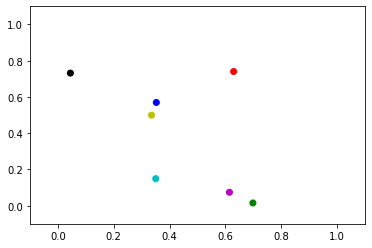

In [5]:
trueK = 7 # Desired number of clusters
colors = 'bgrykcm' # the letters are defining colors for each K. For instance, b is blue and g is gray. 

dim = 2 # dimension of feature space
n = 40 # points per cluster

trueCentroids = np.random.rand(trueK,dim) # generating centroids at random
print(trueCentroids)
if dim==2:
    plt.scatter(trueCentroids[:,0],trueCentroids[:,1], color=colors)
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.show()

#### Generating synthetic datapoints around each center
#### Using multivariate normal distribution with a randomly generated covariance matrix

In [6]:
# The smaller below two numbers, the closer are dots and the bigger the numbers, the messier the plots!
sigma_xx = 0.01 # factor for variance - decides on how far can each new point be from the mean  (try 0.01)
sigma_xy = 0.001 # factor for covariance - decides on how dar x and y can fall apart try(0.001)

XasList = [] # storing the points around each center, as a list of arrays (one array per center)
X = trueCentroids # The actual centroids, to which the generated points will be added

# loop through the centroids
for c in trueCentroids:
    # data generated for each centroid:
    X_c = np.random.multivariate_normal(c,np.array([[sigma_xx*np.random.rand(),  sigma_xy*(2*np.random.rand()-1)], 
                                                    [sigma_xy*(2*np.random.rand()-1), sigma_xx*np.random.rand()]]), n) 
    #print(X_c)
    XasList.append(X_c) # list of arrays
    X = np.append(X,X_c, axis=0) # single array

np.random.shuffle(X) # shuffle the array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  if sys.path[0] == '':


#### Computing clusters

#Plot the points

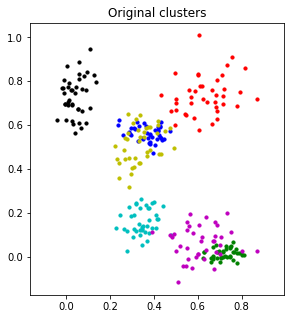

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
for J in range(trueK):
    X_c = XasList[J]
    plt.scatter(X_c[:, 0], X_c[:, 1], c=colors[J], s=10) 
    plt.title("Original clusters")
    plt.xlim(-0.2,1.2)
    plt.ylim(-0.2,1.2)
    plt.axis('equal')

## Hierarchical Clustering

For $k$ between 10 and 2 we can observe how the hierarchical clustering works, for the different _linkage_ methods.

The _linkage_ is the criteria by which it is determined which 2 clusters are joined:

- ward: the clusters joined are those that result in minimal variance

- average: the clusters joined are those with minimal average distance between every pair of points (one in each cluster)

- complete: the clusters joined minimize the maximum distance between a pair of points, one in each cluster

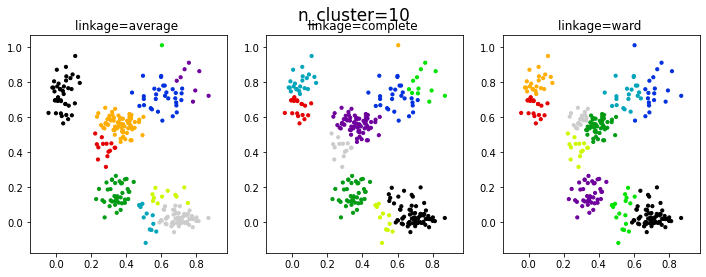

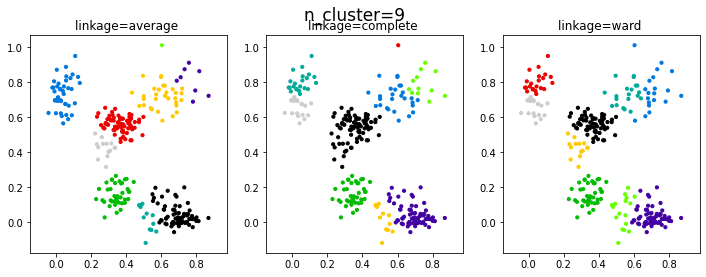

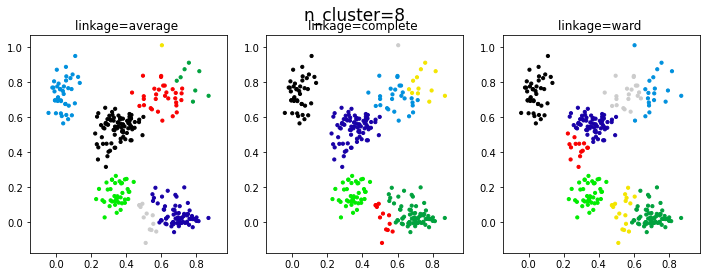

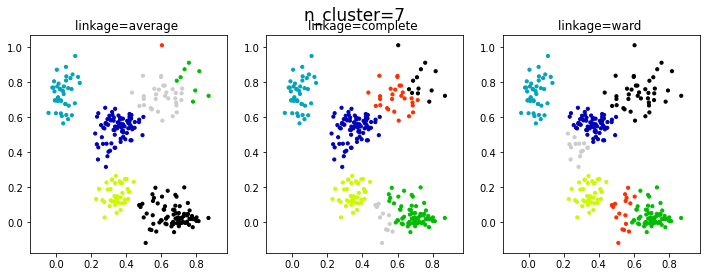

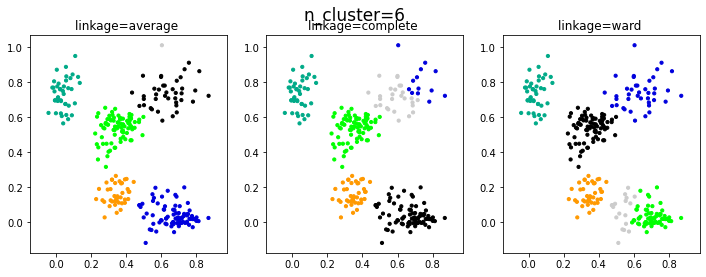

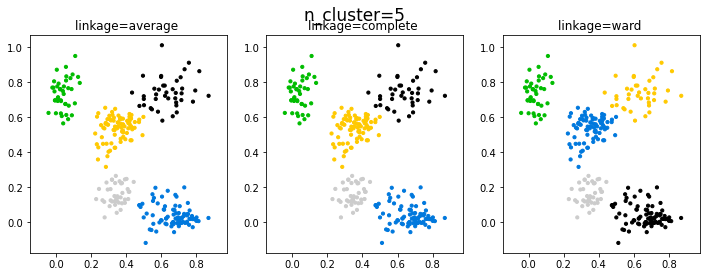

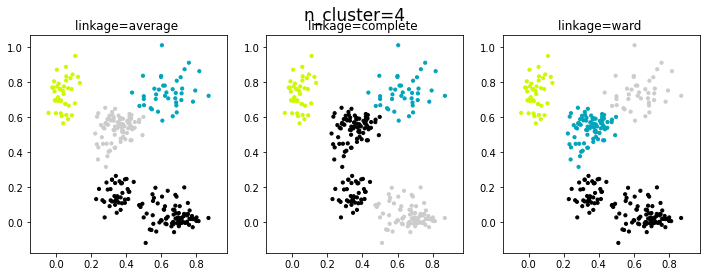

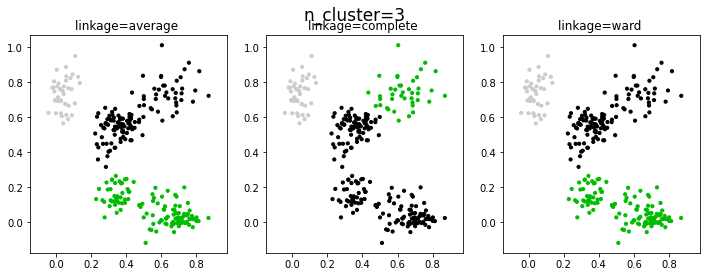

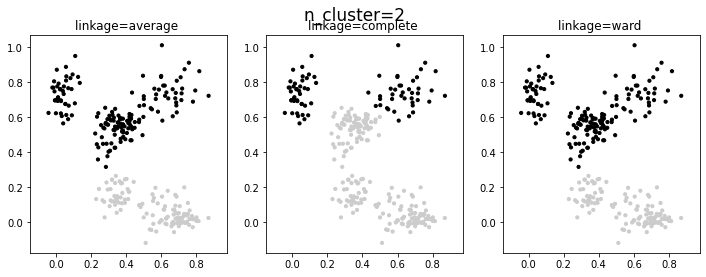

In [8]:
for k in reversed(np.arange(2,11)) :
    
    plt.figure(figsize=(12,4))
    for index, linkage in enumerate(('average', 'complete', 'ward')):
        
        plt.subplot(1, 3, index + 1)
        model = AgglomerativeClustering(linkage=linkage, n_clusters=k)
        model.fit(X)
        plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral, s=10)
        plt.title('linkage=%s ' % (linkage))
        plt.xlim(-0.2,1.2)
        plt.ylim(-0.2,1.2)
        plt.axis('equal')
        plt.suptitle('n_cluster=%i' % k, size=17)
        
    plt.show()

Although the different linkage methods give different clusters (even for the same value of $k$), the clusterings are very similar for values around $k=5$

#### Dendrogram

The hierarchical clustering implementation in scipy provides a dendrogram to visualize the way clusters are joined

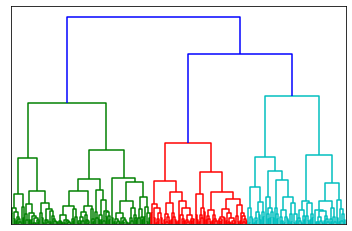

In [ ]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, 'complete')
dn = hierarchy.dendrogram(Z)
plt.xticks(())
plt.yticks(())
plt.show()